In [2]:
%matplotlib inline
import pandas
import matplotlib.pyplot as plt
import numpy as np
import sklearn                        
import sklearn.datasets as ds           
import sklearn.model_selection as cv   
import sklearn.neighbors as nb   
import warnings
from sklearn.feature_extraction.text import CountVectorizer
warnings.filterwarnings("ignore")
X = pandas.read_csv('X.csv', sep=',', na_values="")
y = pandas.read_csv('y.csv', sep=',', na_values="")
word_frequencies = X.sum(axis=0)
filtered_words = word_frequencies[word_frequencies >= 200]
X = X[filtered_words.index]
X = X.sample(frac=0.04, random_state=42)
y = y.loc[X.index]

print(X.shape)
print(y.shape)

(295, 34)
(295, 1)


In [3]:
(X_train, X_test,  y_train, y_test) = cv.train_test_split(X, y, test_size=.3, stratify = y,random_state=1)

### SVM linear


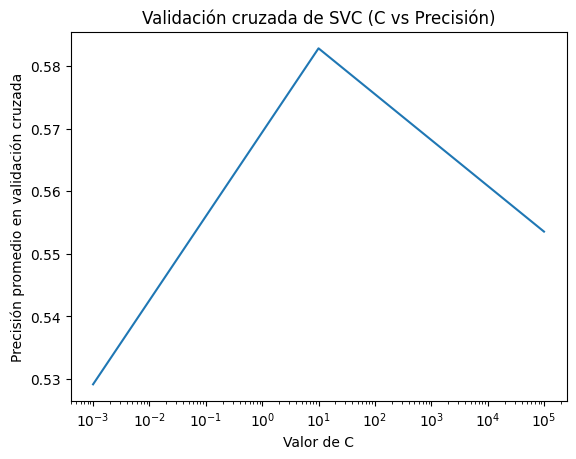

Matriz de confusión en el conjunto de test:
 [[26 21]
 [11 31]]

Exactitud en el conjunto de test:  0.6404494382022472

Classification Report en el conjunto de test:
               precision    recall  f1-score   support

       mucho       0.70      0.55      0.62        47
        poco       0.60      0.74      0.66        42

    accuracy                           0.64        89
   macro avg       0.65      0.65      0.64        89
weighted avg       0.65      0.64      0.64        89


Mejor valor de parámetro C encontrado:  {'C': np.float64(10.0)}

Número de soportes:  152 ( 114 de ellos tienen slacks)
Proporción de soportes:  0.7378640776699029

Para C = 0.001000:
   Precisión media en validación cruzada: 0.5292
   Intervalo de confianza 95%: [0.5205, 0.5378]

Para C = 10.000000:
   Precisión media en validación cruzada: 0.5828
   Intervalo de confianza 95%: [0.5086, 0.6571]

Para C = 100000.000000:
   Precisión media en validación cruzada: 0.5535
   Intervalo de confianza 95%: [

In [13]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics
from sklearn.metrics import classification_report

# Lista de valores de C a probar. Usualmente probamos diferentes órdenes de magnitud
Cs = np.logspace(-3, 5, num=3, base=10.0)

# Definir el grid de parámetros para la búsqueda
param_grid = {'C': Cs}

# Realizar GridSearchCV con SVC lineal y validación cruzada
grid_search = GridSearchCV(SVC(kernel='linear'), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Graficar la precisión de la validación cruzada en función de C
scores = grid_search.cv_results_['mean_test_score']
plt.semilogx(Cs, scores)
plt.xlabel('Valor de C')
plt.ylabel('Precisión promedio en validación cruzada')
plt.title('Validación cruzada de SVC (C vs Precisión)')
plt.show()

# Obtener el mejor valor de C encontrado
parval = grid_search.best_params_

# Aplicar el mejor modelo SVC con el parámetro C encontrado
knc = SVC(C=parval['C'], kernel='linear')
knc.fit(X_train, y_train)

# Realizar las predicciones en el conjunto de test
pred = knc.predict(X_test)

# Mostrar la matriz de confusión
print("Matriz de confusión en el conjunto de test:\n", sklearn.metrics.confusion_matrix(y_test, pred))

# Mostrar la exactitud en el conjunto de test
print("\nExactitud en el conjunto de test: ", sklearn.metrics.accuracy_score(y_test, pred))

# Mostrar el classification report en el conjunto de test
print("\nClassification Report en el conjunto de test:\n", classification_report(y_test, pred))

# Mostrar el mejor valor del parámetro C encontrado
print("\nMejor valor de parámetro C encontrado: ", parval)

# Mostrar el número de soportes (vectores de soporte)
print("\nNúmero de soportes: ", np.sum(knc.n_support_), "(", np.sum(np.abs(knc.dual_coef_) == parval['C']), "de ellos tienen slacks)")

# Mostrar la proporción de soportes en el conjunto de entrenamiento
print("Proporción de soportes: ", np.sum(knc.n_support_) / X_train.shape[0])

# Calcular y mostrar el intervalo de confianza para cada valor de C
std_devs = grid_search.cv_results_['std_test_score']  # Desviación estándar de las puntuaciones
confidence_interval = 1.96 * std_devs / np.sqrt(5)  # Intervalo de confianza al 95% (usando 1.96)

# Imprimir los intervalos de confianza para cada valor de C
for i, c_value in enumerate(Cs):
    print(f"\nPara C = {c_value:.6f}:")
    print(f"   Precisión media en validación cruzada: {scores[i]:.4f}")
    print(f"   Intervalo de confianza 95%: [{scores[i] - confidence_interval[i]:.4f}, {scores[i] + confidence_interval[i]:.4f}]")


En este dataset el mejor parametro de C es 

### SVM poly

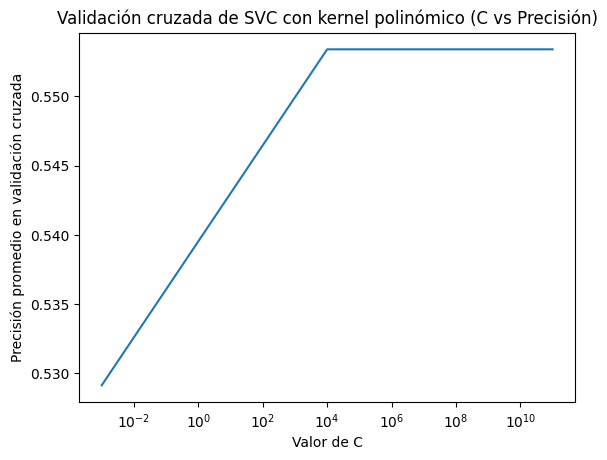

Matriz de confusión en el conjunto de test:
 [[19 28]
 [ 9 33]]

Classification Report en el conjunto de test:
               precision    recall  f1-score   support

       mucho       0.68      0.40      0.51        47
        poco       0.54      0.79      0.64        42

    accuracy                           0.58        89
   macro avg       0.61      0.59      0.57        89
weighted avg       0.61      0.58      0.57        89


Mejor combinación de parámetros encontrada:  {'C': np.float64(10000.0)}

Exactitud en el conjunto de test:  0.5842696629213483

Número de soportes:  137 ( 54 de ellos tienen slacks)
Proporción de soportes:  0.6650485436893204

Para C = 0.001000:
   Precisión media en validación cruzada: 0.5291
   Intervalo de confianza 95%: [0.5249, 0.5334]

Para C = 10000.000000:
   Precisión media en validación cruzada: 0.5534
   Intervalo de confianza 95%: [0.5449, 0.5619]

Para C = 100000000000.000000:
   Precisión media en validación cruzada: 0.5534
   Intervalo de 

In [4]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics
from sklearn.metrics import classification_report

# Lista de valores de C a probar. Usualmente probamos diferentes órdenes de magnitud
Cs = np.logspace(-3, 11, num=3, base=10.0)

# Definir el grid de parámetros para la búsqueda
param_grid = {'C': Cs}

# Realizar GridSearchCV con SVC y kernel polinómico (grado 3) y validación cruzada
grid_search = GridSearchCV(SVC(kernel='poly', degree=3), param_grid, cv=2)
grid_search.fit(X_train, y_train)

# Graficar la precisión de la validación cruzada en función de C
scores = grid_search.cv_results_['mean_test_score']
plt.semilogx(Cs, scores)
plt.xlabel('Valor de C')
plt.ylabel('Precisión promedio en validación cruzada')
plt.title('Validación cruzada de SVC con kernel polinómico (C vs Precisión)')
plt.show()

# Obtener el mejor valor de C encontrado
parval = grid_search.best_params_

# Aplicar el mejor modelo SVC con el parámetro C encontrado y kernel polinómico (grado 3)
knc = SVC(kernel='poly', degree=3, C=parval['C'])
knc.fit(X_train, y_train)

# Realizar las predicciones en el conjunto de test
pred = knc.predict(X_test)

# Mostrar la matriz de confusión
print("Matriz de confusión en el conjunto de test:\n", sklearn.metrics.confusion_matrix(y_test, pred))

# Mostrar el classification report en el conjunto de test
print("\nClassification Report en el conjunto de test:\n", classification_report(y_test, pred))

# Mostrar el mejor valor del parámetro C encontrado
print("\nMejor combinación de parámetros encontrada: ", parval)

# Mostrar la exactitud en el conjunto de test
print("\nExactitud en el conjunto de test: ", sklearn.metrics.accuracy_score(y_test, pred))

# Mostrar el número de soportes (vectores de soporte)
print("\nNúmero de soportes: ", np.sum(knc.n_support_), "(", np.sum(np.abs(knc.dual_coef_) == parval['C']), "de ellos tienen slacks)")

# Mostrar la proporción de soportes en el conjunto de entrenamiento
print("Proporción de soportes: ", np.sum(knc.n_support_) / X_train.shape[0])

# Calcular y mostrar el intervalo de confianza para cada valor de C
std_devs = grid_search.cv_results_['std_test_score']  # Desviación estándar de las puntuaciones
confidence_interval = 1.96 * std_devs / np.sqrt(5)  # Intervalo de confianza al 95% (usando 1.96)

# Imprimir los intervalos de confianza para cada valor de C
for i, c_value in enumerate(Cs):
    print(f"\nPara C = {c_value:.6f}:")
    print(f"   Precisión media en validación cruzada: {scores[i]:.4f}")
    print(f"   Intervalo de confianza 95%: [{scores[i] - confidence_interval[i]:.4f}, {scores[i] + confidence_interval[i]:.4f}]")


### SVM rbf

In [6]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import numpy as np
import sklearn.metrics
from sklearn.metrics import classification_report

# Lista de valores de C y gamma a probar. Usualmente probamos diferentes órdenes de magnitud
Cs = np.logspace(-3, 11, num=3, base=10.0)
gammas = np.logspace(-3, 3, num=3, base=10.0)

# Definir el grid de parámetros para la búsqueda
param_grid = {'C': Cs, 'gamma': gammas}

# Realizar GridSearchCV con SVC y kernel RBF (Radial Basis Function) y validación cruzada
grid_search = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Obtener el mejor valor de C y gamma encontrados
parval = grid_search.best_params_

# Aplicar el mejor modelo SVC con los parámetros C y gamma encontrados
knc = SVC(C=parval['C'], gamma=parval['gamma'])
knc.fit(X_train, y_train)

# Realizar las predicciones en el conjunto de test
pred = knc.predict(X_test)

# Mostrar la matriz de confusión
print("Matriz de confusión en el conjunto de test:\n", sklearn.metrics.confusion_matrix(y_test, pred))

# Mostrar el classification report en el conjunto de test
print("\nClassification Report en el conjunto de test:\n", classification_report(y_test, pred))

# Mostrar el mejor valor de C y gamma encontrados
print("\nMejor combinación de parámetros encontrada: ", parval)

# Mostrar la exactitud en el conjunto de test
print("\nExactitud en el conjunto de test: ", sklearn.metrics.accuracy_score(y_test, pred))

# Mostrar el número de soportes (vectores de soporte)
print("\nNúmero de soportes: ", np.sum(knc.n_support_), "(", np.sum(np.abs(knc.dual_coef_) == parval['C']), "de ellos tienen slacks)")

# Mostrar la proporción de soportes en el conjunto de entrenamiento
print("Proporción de soportes: ", np.sum(knc.n_support_) / X_train.shape[0])

# Calcular y mostrar el intervalo de confianza para cada combinación de C y gamma
# Obtener las puntuaciones y desviaciones estándar de la validación cruzada
scores = grid_search.cv_results_['mean_test_score']
std_devs = grid_search.cv_results_['std_test_score']

# Calcular el intervalo de confianza al 95% para cada combinación
confidence_interval = 1.96 * std_devs / np.sqrt(5)  # 1.96 para un intervalo de confianza del 95% con 5 folds

# Imprimir los intervalos de confianza para cada combinación de C y gamma
for i, (c_value, gamma_value) in enumerate(zip(Cs, gammas)):
    print(f"\nPara C = {c_value:.6f} y gamma = {gamma_value:.6f}:")
    print(f"   Precisión media en validación cruzada: {scores[i]:.4f}")
    print(f"   Intervalo de confianza 95%: [{scores[i] - confidence_interval[i]:.4f}, {scores[i] + confidence_interval[i]:.4f}]")


Matriz de confusión en el conjunto de test:
 [[23 24]
 [10 32]]

Classification Report en el conjunto de test:
               precision    recall  f1-score   support

       mucho       0.70      0.49      0.57        47
        poco       0.57      0.76      0.65        42

    accuracy                           0.62        89
   macro avg       0.63      0.63      0.61        89
weighted avg       0.64      0.62      0.61        89


Mejor combinación de parámetros encontrada:  {'C': np.float64(10000.0), 'gamma': np.float64(1.0)}

Exactitud en el conjunto de test:  0.6179775280898876

Número de soportes:  178 ( 57 de ellos tienen slacks)
Proporción de soportes:  0.8640776699029126

Para C = 0.001000 y gamma = 0.001000:
   Precisión media en validación cruzada: 0.5292
   Intervalo de confianza 95%: [0.5205, 0.5378]

Para C = 10000.000000 y gamma = 1.000000:
   Precisión media en validación cruzada: 0.5292
   Intervalo de confianza 95%: [0.5205, 0.5378]

Para C = 100000000000.000000 y 

### Informe del millor SVM